# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

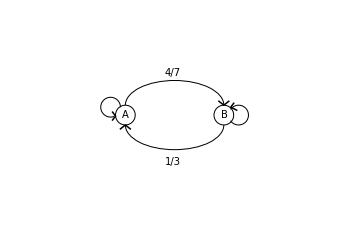

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

**Solución:**

Definimos los estados como **A=0** y **B=1**, por lo que, los posibles pasos los codificamos como sumas entre $-1$, $0$ o $1$ con probabilidad de, si estamos en **A** $0,3/7,4/7$ respectivamente; de lo contrario con probabilidad de $1/3,2/3$ y $0$ respectivamente.

In [1]:
import numpy as np

In [2]:
def proceso(I,N):
    C=[I]
    s=[-1,0,1]
    for p in range(N):
        if C[-1]==0:
            prob=[0,3/7,4/7]
        else:
            prob=[1/3,2/3,0]
        C.append(C[-1]+np.random.choice(s,p=prob))
    return C

In [3]:
import matplotlib.pyplot as plt

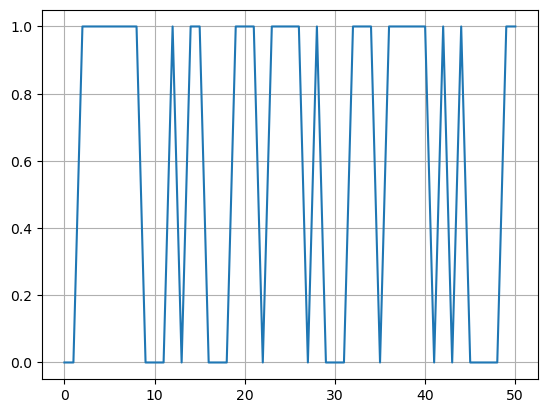

In [9]:
# probando el proceso
plt.plot(proceso(0,50))
plt.grid()

In [10]:
# Montecarlo
A=0
B=1
E=[]
for i in range(100000):            # 100 000 escenarios
    E.append(proceso(0,50)[-1])    # Extraemos el último estado de 'proceso'
Bernoulli=np.array(E)==B
Bernoulli

array([False, False,  True, ...,  True, False,  True])

In [11]:
# Probabilidad de que el proceso termine en 'B'
Bernoulli.mean()

0.63057

**Respuesta:**
La probabilidad de que el proceso termine en el estado **B** usando simulación montecarlo con 100000 escenarios es de 63\%.

---

---
## Problema 2. Evaluación numérica de integrales utilizando Montecarlo
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

* Defina la función para resolver el área con el método 2 visto en clase

In [12]:
def montecarlo2(region,a1,b1,a2,b2,N):
    ux=np.random.uniform(a1,b1,N)   # N puntos aleatorios uniformemente distribuidos entre a1 y b1
    uy=np.random.uniform(a2,b2,N)   # N puntos aleatorios uniformemente distribuidos entre a2 y b2
    B=region(ux,uy)                 # Variable de Bernoulli
    AR=(b1-a1)*(b2-a2)              # Área (conocida) del rectángulo
    return np.mean(B)*AR

* Encontrar el área con el número de términos deseados

In [13]:
def region(x,y):
    return x**2+2*y**2<=-2*x+8*y-7

Cuidar que no se corte la región y que el cuadro de integración quede lo más ajustado posible.

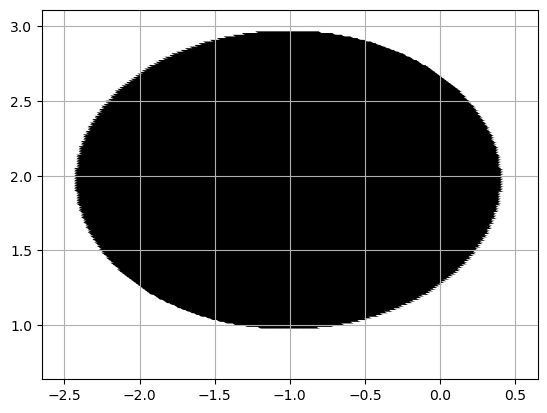

In [18]:
N=200
# Encontramos los límites de integración (prueba y error)
a1,b1 = -2.5,0.5     #-3,1      #-5,5 # Para 'x'
a2,b2 = 0.75,3       #0,4       #-5,5 # Para 'y'

x=np.linspace(a1,b1,N)
y=np.linspace(a2,b2,N)
X,Y=np.meshgrid(x,y)

plt.scatter(X,Y,c=~region(X,Y),cmap='gray')
plt.grid()

In [19]:
N=np.logspace(1,5,5).astype('int')
N

array([    10,    100,   1000,  10000, 100000])

In [20]:
import pandas as pd

In [21]:
tabla=pd.DataFrame(index=N,columns=['aprox','error'])
AR=(b1-a1)*(b2-a2)
for n in N:
    tabla.loc[n,'aprox']=montecarlo2(region,a1,b1,a2,b2,n)
    th=tabla.loc[n,'aprox']/AR
    tabla.loc[n,'error']=np.sqrt(th*(1-th)/n)
tabla

,aprox,error
10,3.375,0.158114
100,4.7925,0.045376
1000,4.32,0.015179
10000,4.46715,0.004731
100000,4.437247,0.001501


---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2021 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2020 y muestre sus gráficas.

In [22]:
import pandas_datareader.data as web

In [23]:
def getClose(names,start,end):
    return web.DataReader(names,'yahoo',start,end)['Adj Close']

In [24]:
names=['AAPL','MSFT'] # Apple, Microsoft
start='2015-01-01'
end='2020-12-31'
data=getClose(names,start,end)

<AxesSubplot:xlabel='Date'>

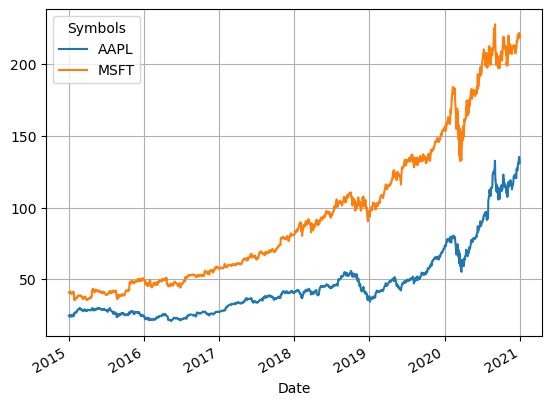

In [25]:
data.plot(grid=True)

---
En caso de que no se puedan descargar los datos

In [28]:
d1=pd.read_csv('AAPL.csv')
d2=pd.read_csv('MSFT.csv')

In [31]:
dat=pd.DataFrame(index=d1['Date'],data=d1['Adj Close'].values,columns=['AAPL'])
dat.head()

,AAPL
Date,
2015-01-26,25.493813
2015-01-27,24.601191
2015-01-28,25.991964
2015-01-29,26.801186
2015-01-30,26.408974


In [32]:
dat['MSFT']=d2['Adj Close'].values
dat.head()

,AAPL,MSFT
Date,,
2015-01-26,25.493813,41.145248
2015-01-27,24.601191,37.337940
2015-01-28,25.991964,36.051331
2015-01-29,26.801186,36.769024
2015-01-30,26.408974,35.359890


---

Calcule los rendimientos diarios junto con sus características estadísticas

In [26]:
R=data.pct_change().dropna()
R.head()

Symbols,AAPL,MSFT
Date,,
2015-01-05,-0.028172,-0.009196
2015-01-06,0.000094,-0.014677
2015-01-07,0.014022,0.012705
2015-01-08,0.038422,0.029418
2015-01-09,0.001073,-0.008405


In [33]:
m=R.mean()
s=R.std()

In [34]:
m,s

(Symbols
 AAPL    0.001283
 MSFT    0.001265
 dtype: float64,
 Symbols
 AAPL    0.018667
 MSFT    0.017527
 dtype: float64)

Simule 1000 escenarios de rendimientos diarios para el 2021 (para cada una de las empresas)

In [35]:
def simR(m,s,start,end,N):
    date=pd.date_range(start,end)
    dias=len(date)
    datos=np.random.normal(m,s,(dias,N))
    return pd.DataFrame(datos,index=date)

In [36]:
R_AAPL=simR(m['AAPL'],s['AAPL'],'2021-01-01','2021-12-31',1000)
R_MSFT=simR(m['MSFT'],s['MSFT'],'2021-01-01','2021-12-31',1000)

In [37]:
R_AAPL.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-01-01,-0.011935,-0.006091,0.001435,0.003685,-0.002528,-0.015939,-0.014334,-0.033111,0.025731,-0.000945,...,0.028875,0.017779,-0.009131,-0.019365,0.000702,0.042949,0.032359,0.018001,-0.018647,0.005928
2021-01-02,-0.000726,0.016142,0.028725,0.017174,-0.022824,0.004973,0.038268,-0.026118,0.004703,-0.010773,...,-0.003503,0.006817,0.000108,0.007738,0.008457,-0.014717,0.022503,-0.024713,-0.009485,0.029943
2021-01-03,-0.007253,0.008055,-0.043862,-0.015062,0.023384,0.015632,-0.014696,0.015647,0.033911,0.013710,...,0.035774,0.032488,0.025512,0.008000,0.009263,-0.007178,-0.001459,-0.041085,-0.001434,0.016368


In [39]:
R_MSFT.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-01-01,0.007027,0.010115,0.003097,-0.005344,0.049434,-0.002581,-0.005870,-0.006753,-0.013504,0.008587,...,0.016294,-0.000336,0.005277,-0.005519,0.001188,0.021919,-0.012849,0.009257,0.004013,-0.032362
2021-01-02,-0.041701,-0.016057,-0.004461,-0.001403,-0.029249,0.032052,0.002939,0.019425,-0.000679,-0.020659,...,0.013673,-0.034224,-0.015593,0.003242,0.011771,0.027908,0.010865,0.021996,-0.006877,0.018251
2021-01-03,0.022740,0.002092,0.004858,0.009646,0.013638,-0.025059,0.013249,0.016521,-0.011498,-0.019136,...,-0.026521,0.005174,0.033940,0.016717,-0.018913,-0.004773,0.025689,-0.000387,0.005103,-0.001178


Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

Finalmente, grafique los datos reales del 2021 para ver que tan acertado fue nuestro análisis.